In [131]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

In [132]:
df = pd.read_csv('EDA1.csv')
df.drop(columns = ['Day'], axis = 1, inplace = True)
well_4 = df[df['Well Name'] == 4]
well_4.drop(columns = ['Well Name'], axis = 1, inplace = True)
well_4.reset_index(inplace = True, drop = True)
well_4 = pd.Series(data = well_4['Oil Volume'])
well_4 = well_4[well_4 > 0]
well_4.reset_index(inplace = True, drop = True)

C:\Users\csmid\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Text(0,0.5,'Production (BBL)')

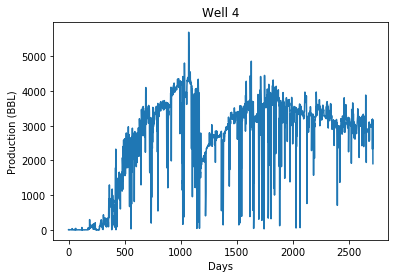

In [141]:
plt.plot(well_4)
plt.title('Well 4')
plt.xlabel('Days')
plt.ylabel('Production (BBL)')

In [134]:
from numpy import percentile
multiplier = 1.5
def outlier_finder(data, timesteps, multiplier):
    outliers_index = []
    outliers_value = []
    for i in range(0, 1098, timesteps):
        q25 = percentile(data[i:i+timesteps], 25)
        q75 = percentile(data[i:i+timesteps], 75)
        iqr = q75 - q25
        cut_off = iqr * multiplier
        lower, upper = q25 - cut_off, q75 + cut_off
        outliers = [x for x in data[i:i+timesteps] if x < lower or x > upper]
        outliers_value.extend(outliers)
        for idx, val in enumerate(data[i:i+timesteps]):
            if val in outliers:
                outliers_index.append(idx + i)
    index = outliers_index
    value = outliers_value
    return index, value

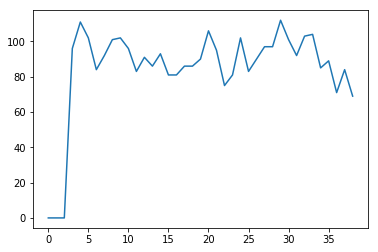

In [135]:
num_of_outliers = []
for i in range(1,40):
    x, y = outlier_finder(well_4, i, multiplier)
    length = len(x)
    num_of_outliers.append(length)
plt.plot(num_of_outliers) 

We will be modeling after index 1230 due to change in decline rates

In [136]:
well_4_predict = well_4[1230:]
well_4_predict.reset_index(inplace = True, drop = True)

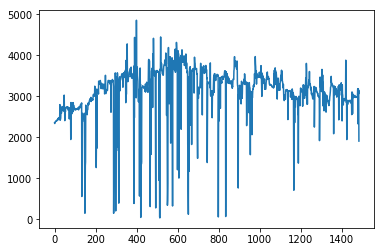

In [137]:
plt.plot(well_4_predict)

Chuck, look at this with 500 timesteps vs 200 timesteps. 500 cleans better at the end, while 200 cleans better in the beggining.

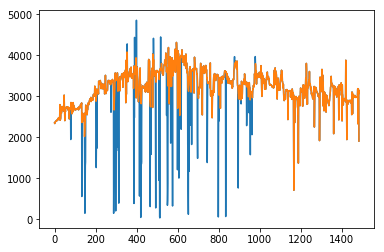

In [138]:
index, values = outlier_finder(well_4_predict, 275, multiplier)
well_4_clean = well_4_predict.drop(index = index)
plt.plot(well_4_predict)
plt.plot(well_4_clean)

In [139]:
for i in range(1, 202, 20):
    index, value = outlier_finder(well_4_predict, i, multiplier)
    total_outliers = len(index)
    print('With %i Timesteps,  %i total outliers are detected'% (i, total_outliers))

With 1 Timesteps,  0 total outliers are detected
With 21 Timesteps,  106 total outliers are detected
With 41 Timesteps,  113 total outliers are detected
With 61 Timesteps,  116 total outliers are detected
With 81 Timesteps,  110 total outliers are detected
With 101 Timesteps,  105 total outliers are detected
With 121 Timesteps,  122 total outliers are detected
With 141 Timesteps,  101 total outliers are detected
With 161 Timesteps,  96 total outliers are detected
With 181 Timesteps,  102 total outliers are detected
With 201 Timesteps,  99 total outliers are detected


In [140]:
well_4_clean.reset_index(inplace = True, drop = True)
well_4_clean.to_csv(r'C:\Users\csmid\Volve Project\well_4_clean.csv', index = None, header = True)